### Задача

Данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')  

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных**
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)  
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах (м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

### Определи и изучим пропущенные значения

**ceiling_height**

In [5]:
df['ceiling_height'].isna().sum()

9195

In [6]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

_Отсутствуют данные о 9195 квартирах, их мы можем заполнить медианным значением_

<AxesSubplot:xlabel='ceiling_height', ylabel='Count'>

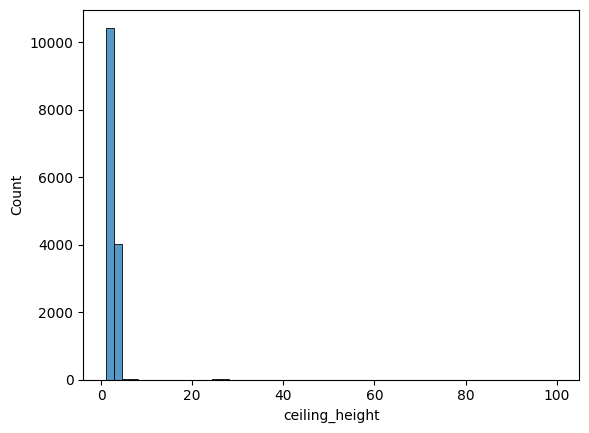

In [7]:
sns.histplot(df['ceiling_height'], bins=55)

_Минимальная высота потолков 1м, максимальная 100м тут мы явно имеем дело с выбросами, некоторые вероятнее всего из-за опечаток при вводе параметра  
Посчитаем их еоличество. За оптимальную высоту возьмем от 2 до 5,5 м_

In [8]:
df.query('ceiling_height < 2 or ceiling_height > 5.5')['ceiling_height'].count()

35

_Аномальных данных достаточно небольшая доля, значит врят-ли имеет место быть систематическая  ошибка_

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 

**locality_name**

In [10]:
df['locality_name'].isna().sum()

49

_Имеет смысл их удалить_

In [11]:
df.dropna(subset=['locality_name'], inplace=True)

In [12]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
df['locality_name'].nunique()

364

_Имеются два варианта написания одного и тогоже слова "поселок" и "посёлок" и два населенных пункта за время сбора данных  
изменили свой административный статус на город - это Кудрово и Мурино, соответственно со временем их полное название изменилось_

In [14]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок').replace({'посёлок Мурино': 'Мурино', 'деревня Кудрово': 'Кудрово'})

In [15]:
df['locality_name'].nunique()

328

_Избавились от неоднотипных написаний населенных пунктов_

**first_day_exposition**

_У даты публикации строковый тип данных  
Преобразуем в дату и обрежем ее до дня_

In [16]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.round('1d')

**floors_total**

In [17]:
df['floors_total'].isnull().sum()

85

_Присутствует 85 пропусков  
Предполагаю, что некоторые люди не указали этажность дома, потому что их недвижимость на последнем этаже  
Подставим в пропуски соответствующий этаж_

In [18]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

**studio**

In [19]:
df['studio'].sum()

149

In [20]:
df[(df['studio'] == True) & (df['rooms'] == 0)]['studio'].sum()

138

_Не у всех студий отмечено количество комнат 0  
Изменим количество комнат в студиях на 0_

In [21]:
df.loc[df['studio'] == True, 'rooms'] = 0 

In [22]:
df[(df['studio'] == False) & (df['rooms'] == 0) & df['kitchen_area'].isna()]['studio'].count()

59

_Так же 59 объектов недвижимости без указанной площади кухни и одновременно с 0 в количестве комнат не указаны, что это студии  
С уверенностью можно исправить их отметку в графе "studio" на "True"_

In [23]:
df.loc[(df['studio'] == False) & (df['rooms'] == 0) & df['kitchen_area'].isna(), 'studio'] = True

**kitchen_area**

_Взглянем что указано в графе "kitchen_area" в студиях_

In [24]:
df.loc[df['studio'] == True, 'kitchen_area'].isna().sum()

208

_Во всех студиях площадь кухни является пропаущенным значением  
Исправим площадь кухни на 0_

In [25]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0

In [26]:
df['kitchen_area'].isna().sum()

2061

_Заполним пропуски медианным значением площади кухни квартир с тем же количеством комнат_

In [27]:
df['kitchen_area'] = df.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median()))

**living_area**

_С жилой площадью сделаем то же что и с площадью кухни_

In [28]:
df['living_area'] = df.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))

**is_apartment**

In [29]:
df['is_apartment'] = df['is_apartment'].fillna(False)

_Пропуски в апартаментах явно отрицательные значения_

**balcony**

In [30]:
df['balcony'] = df['balcony'].fillna(0)

_Не указанные балконы вероятнее всего их отсутствие_

**cityCenters_nearest**

_Переименуем признак в соответствии с общепринятыми нормами_

In [31]:
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Выводы предобработки

На этапе предобработки выполнено:  
- заполнены пропуски в высоте потолков медианным значением
- приведены к одному типу названия некоторых населенных пунктов
- даты преведены к соответствующему типу
- заполнены пропуски в этажности домов
- найдены неуказанные квартиры студии
- заполненеы пропуски жилой площади  
- заполненеы пропуски кухни
- привели к булевому значению признак апартаменты
- заполнили пропуски в признаке количество балконов

Для заполнения пропусков расстоянии до центра города, аэропорта, парка, водоема необходимо знать адрес, а так же для количества парков и водоемов  
Оставим эти пропуски и дальше будем исследовать данные, которые имеются  
Количество дней от публикации до снятия объявления есть у тех, которые уже завершены, а пропуски у актуальных объявлений на момент выгрузки

### Создание навых признаков

_Для лучшей визуализации большего обобщения создадим ряд новых признаков: цена квадратного метра квартиры, день недели, месяц и год публикации объявления, тип этажа - первый, последний, средний, соотношение жилой и общей площадей, а также отношение площади кухни к общей_

In [33]:
df['price_m'] = (df['last_price'] / df['total_area']).map(int)     # цена за метр
df['weekday'] = df['first_day_exposition'].dt.weekday + 1        # день недели от 1 до 7 когда опубликовано объявление
df['month'] = df['first_day_exposition'].dt.month                # месяц 
df['year'] = df['first_day_exposition'].dt.year                  # год

In [34]:
df['floor_var'] = 'другой'                                       # ранжирование этажей
df.loc[df['floor'] == 1, 'floor_var'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_var'] = 'последний'

In [35]:
df['living_area_part'] = df['living_area'] / df['total_area'] 
df['kitchen_area_part'] = df['kitchen_area'] / df['total_area']

### Исследовательский анализ

**total_area** - общая площадь

<AxesSubplot:xlabel='total_area', ylabel='Count'>

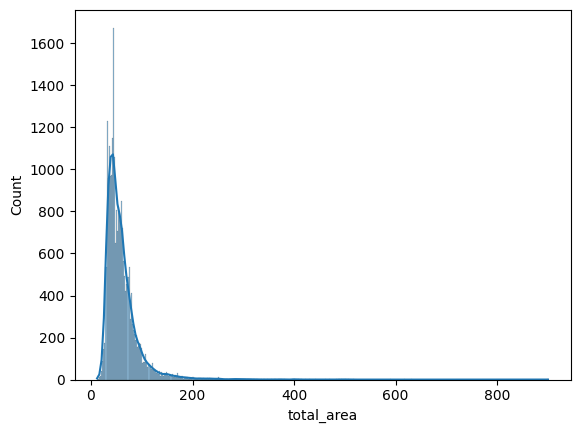

In [36]:
sns.histplot(df['total_area'], kde=True)

_Заметно правостороннее смещение распределения  
Слишком большой разброс взглянем на гистограмму логарифмов_

<AxesSubplot:xlabel='total_area', ylabel='Count'>

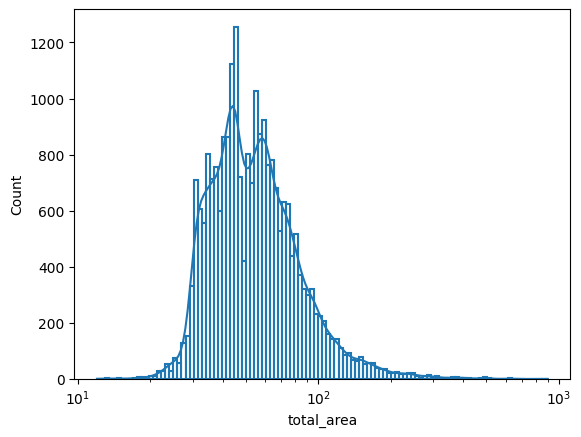

In [37]:
sns.histplot(df['total_area'], kde=True, log_scale=True, fill=False)

In [38]:
df['total_area'].describe(percentiles=[0.96])

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
50%         52.000000
96%        125.000000
max        900.000000
Name: total_area, dtype: float64

_Построим гистограмму для 96% данных для того чтобы отсеить 4% самой наредкость большой по площади недвижимости_

<AxesSubplot:xlabel='total_area', ylabel='Count'>

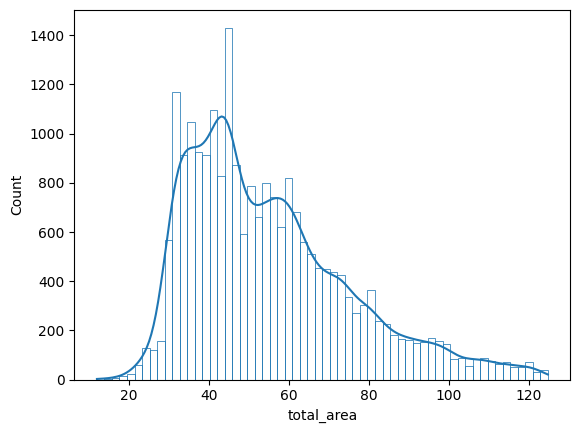

In [39]:
sns.histplot(df[df['total_area'] < 125]['total_area'], kde=True, fill=False)

_Да, определенно правостороннее смещение и соответственно среднее значение больше медианного_

**last_price** - цена

<AxesSubplot:xlabel='last_price', ylabel='Count'>

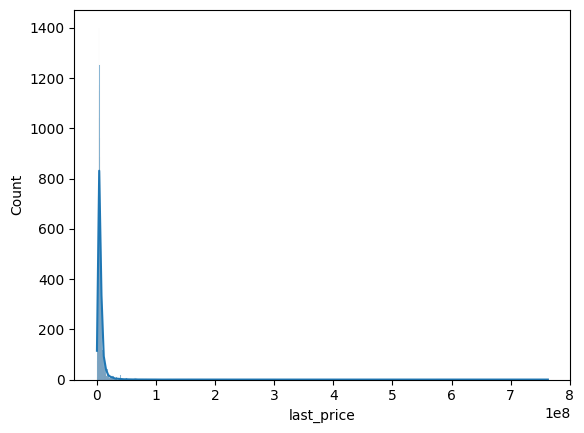

In [40]:
sns.histplot(df['last_price'], kde=True)

<AxesSubplot:xlabel='last_price', ylabel='Count'>

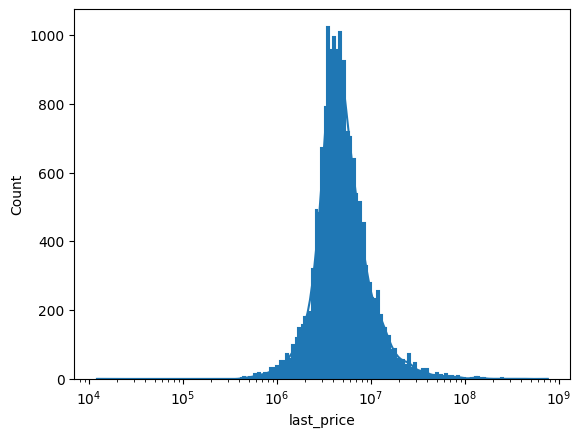

In [41]:
sns.histplot(df['last_price'], kde=True, log_scale=True, fill=False)

_Прологарифмированная цена выстраивается в нормальное распределение_

In [42]:
df['last_price'].describe(percentiles=[0.96])

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
50%      4.650000e+06
96%      1.700000e+07
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:xlabel='last_price', ylabel='Count'>

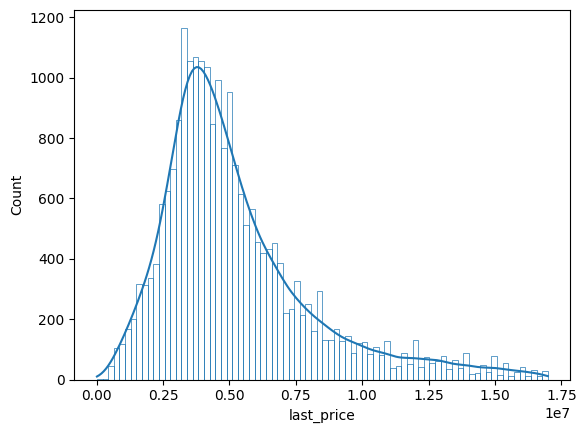

In [43]:
sns.histplot(df[df['last_price'] < 1.7e+7]['last_price'], kde=True, fill=False)

_Так же как и с площадью квартиры имеется смещение вправо, что довольно предсказуемо_

**price_m** - цена за м^2

<AxesSubplot:xlabel='price_m', ylabel='Count'>

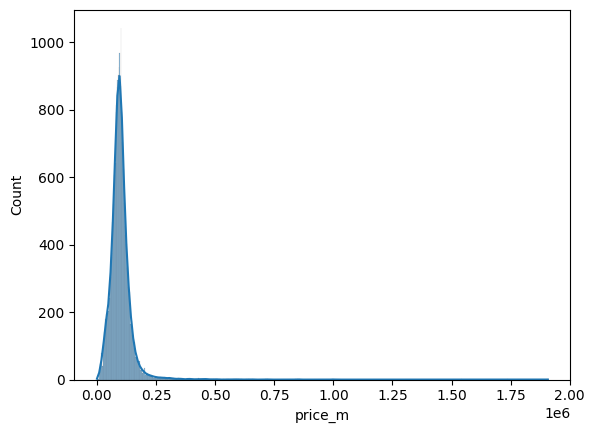

In [44]:
sns.histplot(df['price_m'], kde=True)

<AxesSubplot:xlabel='price_m', ylabel='Count'>

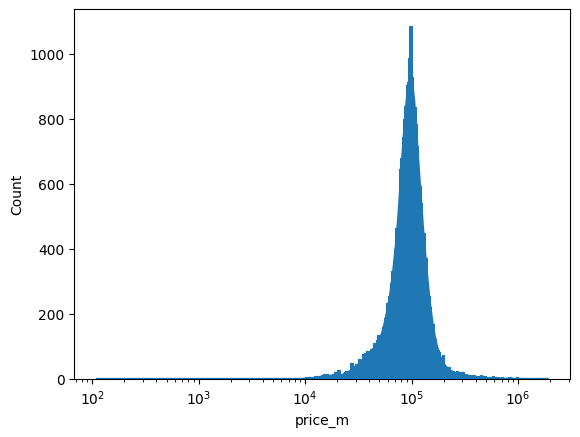

In [45]:
sns.histplot(df['price_m'], kde=True, log_scale=True, fill=False)

In [46]:
df['price_m'].describe(percentiles=[0.04, 0.96])

count    2.365000e+04
mean     9.943180e+04
std      5.033794e+04
min      1.110000e+02
4%       3.797640e+04
50%      9.500000e+04
96%      1.695934e+05
max      1.907500e+06
Name: price_m, dtype: float64

<AxesSubplot:xlabel='price_m', ylabel='Count'>

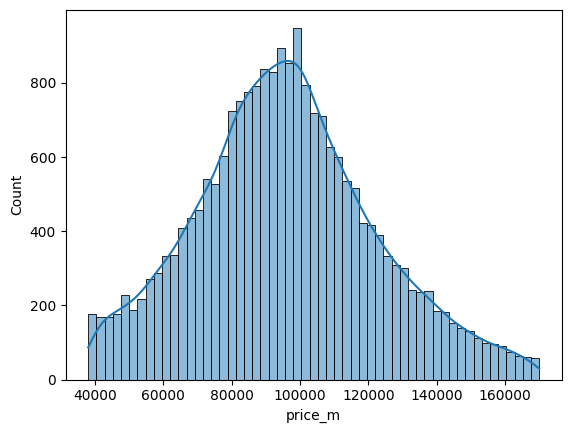

In [47]:
sns.histplot(df.loc[(df['price_m'] > 3.8e+4) & (df['price_m'] < 1.7e+5), 'price_m'], kde=True)

_Нормальное распределение в цене за м^2  
Медиана и среднее довольно близкие значения_

In [48]:
df[df['rooms'] < 6].pivot_table(index='rooms', values='price_m', aggfunc='median').reset_index()

,rooms,price_m
0,0,105078.0
1,1,100000.0
2,2,92814.0
3,3,88983.0
4,4,92607.0
5,5,96516.5


_Цена за м^2 уменьшается с увеличением комнат, но до 4-х комнатных объектов, далее(от 3-х к 4-х и от 4-х к 5-х) увеличивается. В сегменте недвижимости с комнатами от 4-х и выше намного чаще встречается элитная недвижимость, поэтому и медианная цена за м^2 увеличивается_

**rooms** - число комнат

<AxesSubplot:xlabel='rooms', ylabel='Probability'>

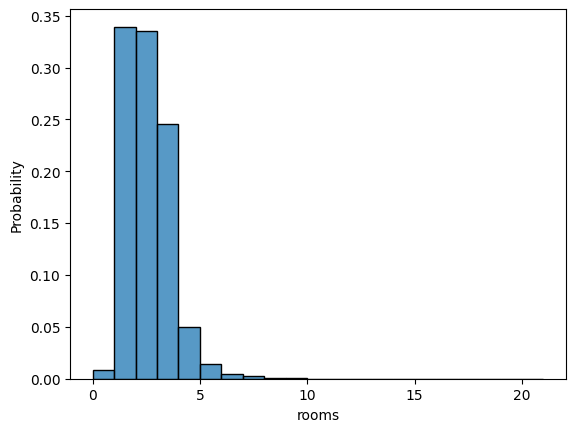

In [49]:
sns.histplot(df['rooms'], binwidth=1, binrange=(0, 21), stat='probability')

_Гистограмма показывает доли недвижимости в объявлениях по количеству комнат  
На 1 и 2-х комнатные приходится почти 70% всех объявлений, а если к ним добавить долю 3-х комнатных, то их общая доля будет более 90%  
Интересно, что 5 комнатных объектов недвижимости в объявлениях почти в 2 раза больше чем студий_

**ceiling_height** - высота потолков

<AxesSubplot:xlabel='ceiling_height', ylabel='Count'>

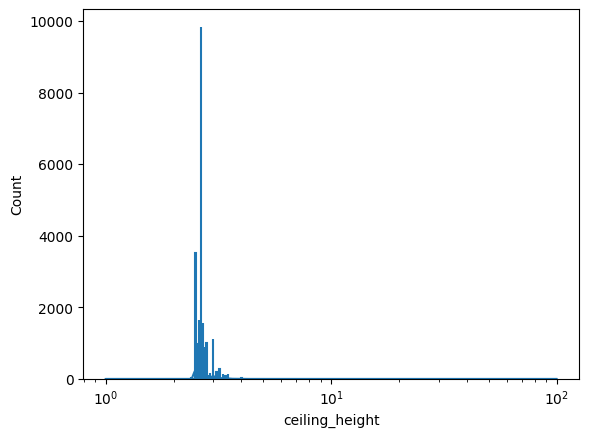

In [50]:
sns.histplot(df['ceiling_height'], kde=True, log_scale=True, fill=False)

_Даже у логарифмированых значений есть выбивающиеся интервалы  
Рассмотрим более правдовадобный интервал высоты потолков от 2,3м до 3,5_

<AxesSubplot:xlabel='ceiling_height', ylabel='Count'>

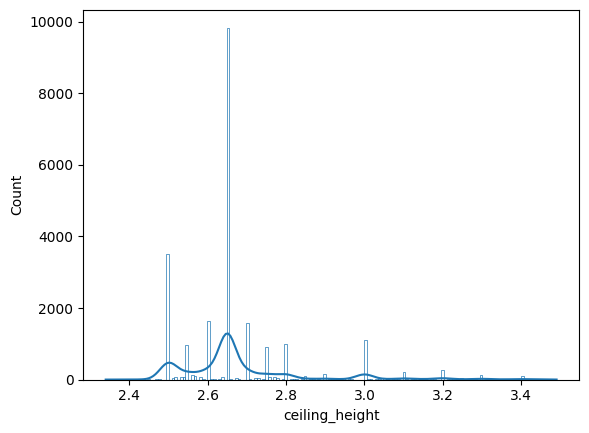

In [51]:
sns.histplot(df.loc[(df['ceiling_height'] > 2.3) & (df['ceiling_height'] < 3.5), 'ceiling_height'], kde=True, fill=False)

_Половина из всех данных приходится на высоту 2,75м это соответствует общим представлениям_

**days** - время продажи квартиры

In [52]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:xlabel='days_exposition', ylabel='Count'>

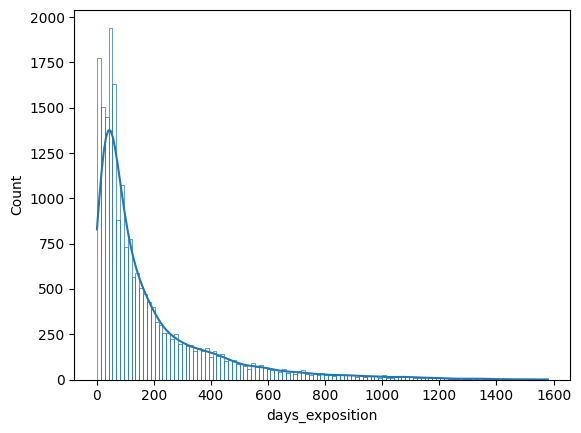

In [53]:
sns.histplot(df['days_exposition'], kde=True, fill=False)

<AxesSubplot:xlabel='days_exposition', ylabel='Count'>

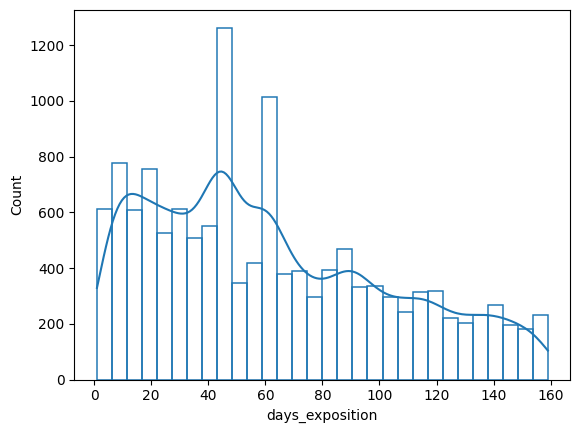

In [54]:
sns.histplot(df.loc[df['days_exposition'] < 160, 'days_exposition'], kde=True, fill=False)

In [55]:
df[df['rooms'] < 6].pivot_table(index='rooms', values='days_exposition', aggfunc='median').reset_index()

,rooms,days_exposition
0,0,45.0
1,1,81.0
2,2,91.0
3,3,114.0
4,4,155.5
5,5,185.5


_Медианное и среднее значения сильно отличаются друг от друга, среднее почти в 2 раза выше, объясняется это тем, что есть достаточно большое количество объявлений которым более 1 года. Есть явно выраженные пики снятия с публикации объявлений 45 и 60 дней, скорее всего это связано с условиями, возможно заканчиваются условия связанные с платными объявлениями  
Так же по сводной таблице видно, что чем больше комнат, тем дольше время предполагаемой продажи_

### Редкие и выбивающиеся значения

_Оставим в наших данных только те строки, признаки которых не относятся к аномальным:  
 - этажность в Санкт-Петербурге и области не бывает больше 35  
 - высоту потолков ограничим от 2,3м и до 5м, выбивающиеся заполним медианой  
 - цену за квадратный метр ограничим от 15 000 до 290 000_

In [56]:
df = df.loc[(df['floors_total']  < 36) & (df['ceiling_height'] >= 2.3) & (df['ceiling_height'] <= 5) & (df['price_m'] >= 1.5e+4) & (df['price_m'] <= 2.9e+5)]

### Факторы влияющие на стоимость квартир

In [57]:
df[['last_price', 'price_m', 'total_area', 'rooms', 
         'floor', 'city_centers_nearest', 'kitchen_area', 'days_exposition']].corr().style.background_gradient(cmap='coolwarm')

,last_price,price_m,total_area,rooms,floor,city_centers_nearest,kitchen_area,days_exposition
last_price,1.000000,0.616817,0.831468,0.523675,0.051219,-0.307109,0.583322,0.128544
price_m,0.616817,1.000000,0.196549,-0.023304,0.194954,-0.399257,0.330636,0.035915
total_area,0.831468,0.196549,1.000000,0.769262,-0.027723,-0.220985,0.576058,0.147938
rooms,0.523675,-0.023304,0.769262,1.000000,-0.153205,-0.175955,0.285777,0.122672
floor,0.051219,0.194954,-0.027723,-0.153205,1.000000,0.005535,0.123410,-0.038860
city_centers_nearest,-0.307109,-0.399257,-0.220985,-0.175955,0.005535,1.000000,-0.173357,-0.055528
kitchen_area,0.583322,0.330636,0.576058,0.285777,0.123410,-0.173357,1.000000,0.102677
days_exposition,0.128544,0.035915,0.147938,0.122672,-0.038860,-0.055528,0.102677,1.000000


_Помимо интуитивно очевидных взаимосвязей таких как прямая корреляция цены и количества комнат, площади и подобных, отметим обратную корреляцию цены за квадратный метр и растоянию до центра города_

_Взгляним на цены за квадратный метр в зависимости от этажа у квартир с различным количеством комнат_

In [58]:
df.pivot_table(index='floor_var', values='price_m', columns='rooms', aggfunc='mean').reset_index()

rooms,floor_var,0,1,2,3,4,5,6,7,8,9,10,11,14,15,16,19
0,другой,109553.609195,103268.400385,99907.015583,97364.484819,103906.872449,107553.835000,109015.218750,115459.058824,97589.750000,85666.5,71726.0,170015.0,92827.0,110169.0,NaN,86091.0
1,первый,95592.500000,87388.811881,78124.601277,78363.847242,80130.656051,93820.333333,106938.111111,126372.000000,109858.666667,172775.0,NaN,NaN,NaN,NaN,NaN,NaN
2,последний,105048.000000,91598.493136,84354.867372,89489.459705,99564.607330,117278.639344,107746.739130,128102.250000,108322.666667,75999.5,111151.5,95264.0,NaN,NaN,105555.0,NaN


_Взглянем на диаграмму рассеяния цены за квадратный метр в зависимости от удаленности от цетра_

<AxesSubplot:xlabel='city_centers_nearest', ylabel='price_m'>

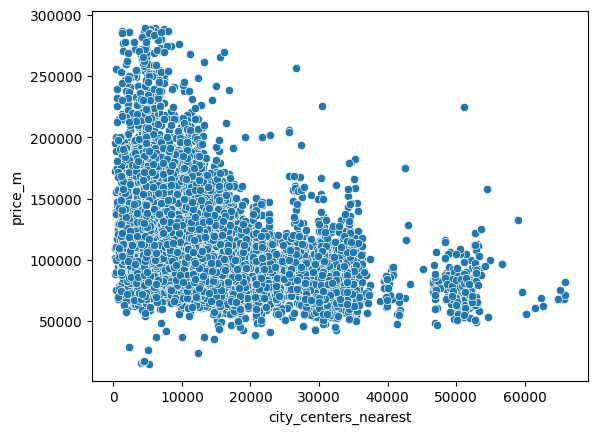

In [59]:
sns.scatterplot(data=df, x='city_centers_nearest', y='price_m')

_Определенно заметно, что есть определенный ценовой сегмент и он существует только в радиусе около 10 000м от центра_

_Вплоть до 6 комнатных квартир меньше всего ценится 1-й этаж, затем последний, а остальные дороже  
В сегменте квартир с более чем 6 комнатами ситуация меняется, больше ценится 1-й этаж, затем последний, возможно это квартиры в старом фонде в центре Санкт-Петербурга_

_Проверим зависимость цены за квадратный метр от дня недели размещения объявления_

<AxesSubplot:title={'center':'Зависимость цены от дня недели'}, xlabel='weekday'>

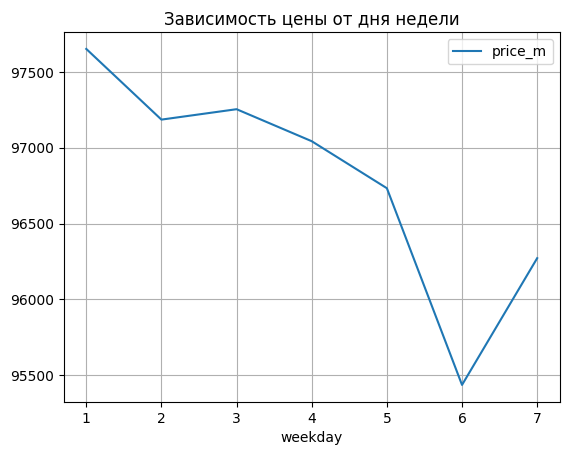

In [60]:
df.pivot_table(index='weekday', values='price_m', aggfunc='mean').plot(grid=True, title='Зависимость цены от дня недели')

_Проверим зависимость количества объявлений от дня недели размещения_

<AxesSubplot:title={'center':'Зависимость количества объявлений от дня недели'}, xlabel='weekday'>

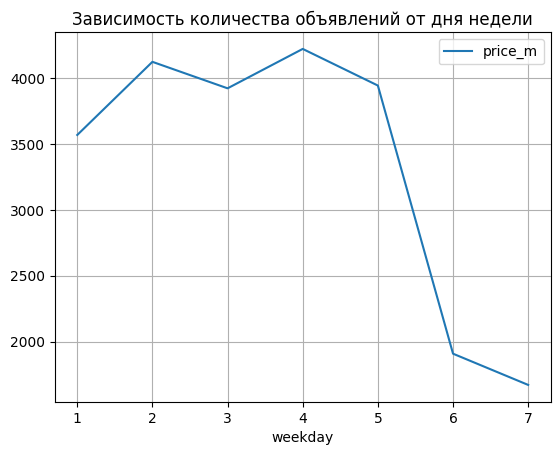

In [61]:
df.pivot_table(index='weekday', values='price_m', aggfunc='count').plot(grid=True, title='Зависимость количества объявлений от дня недели')

_Очевидно, что день влияет на количество поданных заявлений_

_Проверим зависимость цены за квадратный метр от месяца размещения объявления_

<AxesSubplot:title={'center':'Зависимость от месяца'}, xlabel='month'>

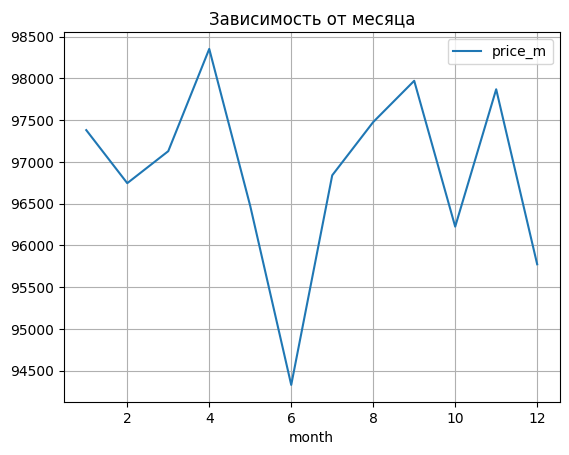

In [62]:
df.pivot_table(index='month', values='price_m', aggfunc='mean').plot(grid=True, title='Зависимость от месяца')

_В середине года средняя цена немного проседает, возможно эта просадка незначительна_

_Зависимость медианной цены от года_

<AxesSubplot:title={'center':'Зависимость цены от года'}, xlabel='year'>

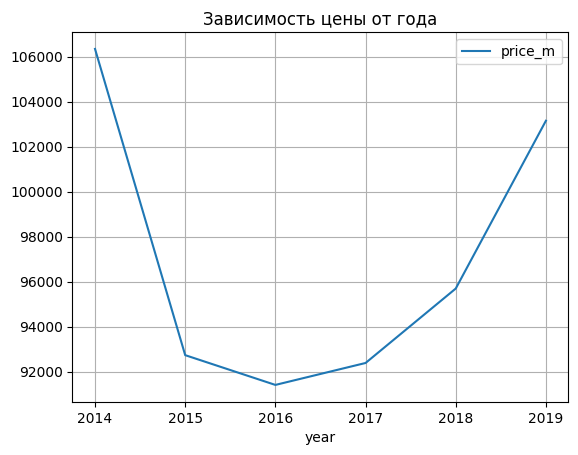

In [63]:
df.pivot_table(index='year', values='price_m', aggfunc='median').plot(grid=True, title='Зависимость цены от года')

In [64]:
(df['year'] == 2014).sum()

131

_За 2014 и 2015 года, когда заработало приложение, всего лишь 131 наблюдение, возможно в начале жизни приложения выкладывали объявления с квартирами из высокого ценового сегмента  
Дальше за каждый год цена увеличивалась_

### Исследуем 10 населенных пунктов с самым большим количеством объявлений

In [65]:
top_10_city = df['locality_name'].value_counts().head(10)

In [66]:
df_top_10 = df.pivot_table(index='locality_name', values='price_m', aggfunc=['mean', 'median', 'count']).sort_values(by=[('count', 'price_m')], ascending=False).head(10)

In [67]:
df_top_10

,mean,median,count
,price_m,price_m,price_m
locality_name,,,
Санкт-Петербург,111004.965313,104413.5,15510
Мурино,86064.363946,86175.0,588
Кудрово,95325.726115,95762.0,471
посёлок Шушары,78676.904545,76876.0,440
Всеволожск,67275.159091,65789.0,396
Пушкин,103125.373984,100000.0,369
Колпино,75424.150888,74723.5,338
посёлок Парголово,90175.489297,91642.0,327


In [68]:
df_top_10.sort_values(('mean', 'price_m'), ascending=False)

,mean,median,count
,price_m,price_m,price_m
locality_name,,,
Санкт-Петербург,111004.965313,104413.5,15510
Пушкин,103125.373984,100000.0,369
Кудрово,95325.726115,95762.0,471
посёлок Парголово,90175.489297,91642.0,327
Мурино,86064.363946,86175.0,588
посёлок Шушары,78676.904545,76876.0,440
Колпино,75424.150888,74723.5,338
Гатчина,69139.167763,67925.5,304


_Населенные пункты расставленые в порядке убывания средней цены за квадратный метр_

### Изучение зависимости стоимости квартиры от расстояния до центра Санкт-Петербурга

_Помимо самого Санкт-Петербурга учтем еще и так называемые города "спутники", которые считаются отдельными населенными пунктами,  
но по факту примыкают вплотную к Санкт-Петербургу и недвижимость сопоставима с ценами в самом городе_

In [69]:
df_spb = df[df['locality_name'].isin(['Санкт-Петербург', 'Кудрово', 'Мурино', 'посёлок Шушары']) & (df['city_centers_nearest'])]

In [70]:
df_spb['city_centers_km'] = round(df_spb['city_centers_nearest']/1000).astype(int)  #переведем в километры для наглядности

C:\Users\dando\AppData\Local\Temp\ipykernel_14444\2110770390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['city_centers_km'] = round(df_spb['city_centers_nearest']/1000).astype(int)  #переведем в километры для наглядности


<AxesSubplot:xlabel='city_centers_km', ylabel='price_m'>

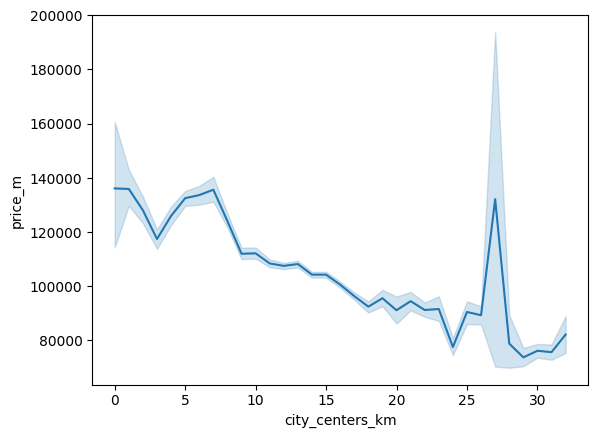

In [74]:
sns.lineplot(data=df_spb, x='city_centers_km', y='price_m')

_Высокая цена за квадратный метр присутствует в диапазоне от 0 до 14 км до центра исследуем этот отрезок подробнее  
Всплеск на растоянии от 25 до 27 км можно объяснить дорогой недвижимостью в ближайшем пригороде_

In [77]:
df_spb.groupby('city_centers_km').agg({'price_m':'mean'}).reset_index().head(15)

,city_centers_km,price_m
0,0,136102.888889
1,1,135887.867816
2,2,128030.196491
3,3,117425.602899
4,4,125939.534918
5,5,132485.880045
6,6,133629.800693
7,7,135613.655440
8,8,124015.010152
9,9,111976.858844


_Цена сильно начинает менятся на удаленности 8км от центра  
Обозначим наш условный центр от 0 до 7км включительно_

### Сравнение квартир в центре с остальными по Санкт-петербургу

_Разделим таблицу на 2 по удаленности от центра до 7км и остальные_

In [84]:
df_center = df_spb.query('city_centers_km <= 7')
df_not_center = df_spb.query('city_centers_km > 7')

_Площадь_

In [88]:
df_center.loc[:, ['total_area', 'price_m', 'ceiling_height']].describe()

,total_area,price_m,ceiling_height
count,3350.000000,3350.000000,3350.000000
mean,89.454687,129994.256119,2.928379
std,54.581868,43298.919057,0.348863
min,12.000000,15345.000000,2.400000
25%,56.000000,99186.250000,2.650000
50%,77.000000,121017.000000,2.800000
75%,106.225000,150000.000000,3.120000
max,631.200000,289473.000000,4.650000


In [89]:
df_not_center.loc[:, ['total_area', 'price_m', 'ceiling_height']].describe()

,total_area,price_m,ceiling_height
count,12541.000000,12541.000000,12541.000000
mean,56.194934,104665.756877,2.659624
std,26.141560,24317.391085,0.142800
min,13.000000,24439.000000,2.300000
25%,40.000000,88281.000000,2.600000
50%,50.000000,101012.000000,2.650000
75%,65.300000,116707.000000,2.700000
max,470.300000,286666.000000,4.700000


_По площади явно видно, что в центре квартиры на порядок больше  
Средняя цена на 30% больше, медианная на 20%  
Высота потолков тоже в центре больше, хоть и не намного_

In [93]:
df_center[['last_price', 'price_m', 'total_area', 'rooms', 'ceiling_height',
         'floor', 'city_centers_km', 'kitchen_area', 'days_exposition']].corr().style.background_gradient()

,last_price,price_m,total_area,rooms,ceiling_height,floor,city_centers_km,kitchen_area,days_exposition
last_price,1.000000,0.510841,0.823386,0.485012,0.209639,0.149756,-0.024963,0.529353,0.122667
price_m,0.510841,1.000000,0.029491,-0.190515,0.005849,0.188778,0.061998,0.230770,0.026931
total_area,0.823386,0.029491,1.000000,0.745851,0.263017,0.080480,-0.092390,0.525001,0.139501
rooms,0.485012,-0.190515,0.745851,1.000000,0.239987,-0.057165,-0.172985,0.300994,0.131884
ceiling_height,0.209639,0.005849,0.263017,0.239987,1.000000,-0.163946,-0.217348,0.143417,0.092658
floor,0.149756,0.188778,0.080480,-0.057165,-0.163946,1.000000,0.232267,0.108799,0.007181
city_centers_km,-0.024963,0.061998,-0.092390,-0.172985,-0.217348,0.232267,1.000000,-0.051384,-0.058426
kitchen_area,0.529353,0.230770,0.525001,0.300994,0.143417,0.108799,-0.051384,1.000000,0.114198
days_exposition,0.122667,0.026931,0.139501,0.131884,0.092658,0.007181,-0.058426,0.114198,1.000000


_Корреляции такие как общая площадь и цена и подобные очевидные ничем не отличаются от корреляций во всей таблице_

_Цена за квадратный метр имеет обатную корреляцию с расстоянием от центра, но в центре это никак не проявляется, а заметно стновится на расстоянии  
7км от центра_

### Выводы

Была проведена предобработка данных:  
- исправлены некоторые некорректные значения  
- заполнены пропуски(где уместно)  
- унифицировали названия населенных пунктов
- удалены "безответственно" заполненные пользователем объявления  
Выявлена сезонная составляющая продаж квартир. Весной и осенью активность продаж повышается, летом самая низкая.
К 2016 году цена на квартины немного снизилась по сравнению с 2015 году, но после росла, ускоряясь к 2019 году.
По сравнению с центром Санкт-Петербурга цена в остальной части города заметно ниже, высота потолков,
площадь потолков, явно отличаются в меньшую сторону, максимальное количество этажей меньше в центре.